In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##  February 12, 2021  ##
##                     ##
#########################

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
dat = np.array([[100, 89, 89, 92, 78, 101, 90, 82, 95, 108, 111, 112,
    125, 123, 100, 102, 112, 112, 100, 107, 103, 129, 118, 149],
    [709, 740, 586, 806, 694, 760, 664, 509, 619, 652, 772, 896,
    742, 831, 667, 772, 838, 679, 889, 690, 698, 860, 799, 882]]).T
dat = dat/10

n = dat.shape[0]
yy = dat[:,1]
XX = np.vstack([np.ones(n),dat[:,0]]).T
p = XX.shape[1]

In [6]:
# We compute the coeff.
# Calculating the inverse
beta_0, beta_1 = np.linalg.inv(XX.T @ XX) @ XX.T @ yy
np.round(np.array([beta_0, beta_1]), 3)

array([33.482,  3.846])

In [7]:
# Using solve
beta_0, beta_1 = np.linalg.solve(XX.T @ XX, XX.T @ yy)
np.round(np.array([beta_0, beta_1]), 3)

array([33.482,  3.846])

In [8]:
# Using the least squares procedure
beta_0, beta_1 = np.linalg.lstsq(XX, yy, rcond=None)[0]
np.round(np.array([beta_0, beta_1]), 3)

array([33.482,  3.846])

In [6]:
# Calculate the SSR
hat_yy = XX @ np.array([beta_0, beta_1])
SSR = sum((hat_yy-yy)**2)
round(SSR,3)

1426.5

In [7]:
# Using the least squares procesure
SSR = np.linalg.lstsq(XX, yy, rcond=None)[1]
np.round(SSR,3)

array([1426.5])

In [8]:
# We get confidence interval
alpha = 0.05
x0 = np.linspace(7, 15, 50)
X0 = np.array([np.ones(len(x0)),x0]).T

aux_t_conf = np.sqrt(SSE/(n-p)*(np.diag(X0 @ np.linalg.inv(XX.T @ XX) @ X0.T)))
yy0_hat = X0 @ np.array([beta_0, beta_1])
upp_conf = yy0_hat+t.ppf(1-alpha/2,n-p)*aux_t_conf
low_conf = yy0_hat-t.ppf(1-alpha/2,n-p)*aux_t_conf

# We get prediction interval
aux_t_pred = np.sqrt(SSE/(n-p)*(1+np.diag(X0 @ np.linalg.inv(XX.T @ XX) @ X0.T)))
yy0_hat = X0 @ np.array([beta_0, beta_1])
upp_pred = yy0_hat+t.ppf(1-alpha/2,n-p)*aux_t_pred
low_pred = yy0_hat-t.ppf(1-alpha/2,n-p)*aux_t_pred

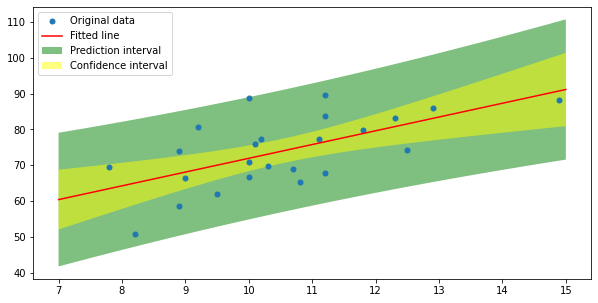

In [9]:
plt.figure(figsize=(10,5))
plt.plot(dat[:,0], yy, 'o', label='Original data', markersize=5)
plt.plot(x0, beta_0+beta_1*x0, 'r', label='Fitted line')
plt.fill_between(x0, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x0, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.legend(loc='upper left')